In [33]:
#Import the libraries :

import pandas as pd
import seaborn as sns
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
import numpy as np
from sklearn.model_selection import KFold
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



import seaborn as sns

In [2]:
# Read the csv file :
data_file = r'Churn_Modelling.csv'
churn_df = pd.read_csv(data_file)

In [4]:
churn_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
# information :
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


#### Exploratory Data Analysis :

Examine : CreditScore

In [10]:
churn_df['CreditScore'].head()

0    619
1    608
2    502
3    699
4    850
Name: CreditScore, dtype: int64

In [12]:
churn_df['CreditScore'].value_counts()

850    233
678     63
655     54
705     53
667     53
      ... 
404      1
351      1
365      1
417      1
419      1
Name: CreditScore, Length: 460, dtype: int64

Examine : Geography

In [14]:
churn_df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [15]:
#Converting it in Numerical:
churn_df.Geography = pd.Categorical(churn_df.Geography).codes

In [16]:
churn_df['Geography'].value_counts()

0    5014
1    2509
2    2477
Name: Geography, dtype: int64

In [17]:
dtype_1= churn_df['Geography'].dtypes
dtype_1

dtype('int8')

Examine : Gender 

In [18]:
churn_df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [19]:
# Replace 'churn_df' with the actual name of your DataFrame if different
# Define a mapping for 'Male' and 'Female'
gender_mapping = {'Male': 0, 'Female': 1}

# Apply the mapping to the 'Gender' column
churn_df['Gender'] = churn_df['Gender'].map(gender_mapping)

In [21]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  int8   
 5   Gender           10000 non-null  int64  
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(10), int8(1), object(1)
memory usage: 1.0+ MB


#### Drop Unnecessary Columns:

In [22]:
drop_col = ['RowNumber','Surname','CustomerId']

churn_df.drop(columns= drop_col , inplace = True)

#### Exploring Correlations : 

In [23]:
corr = churn_df.corr()

<Axes: >

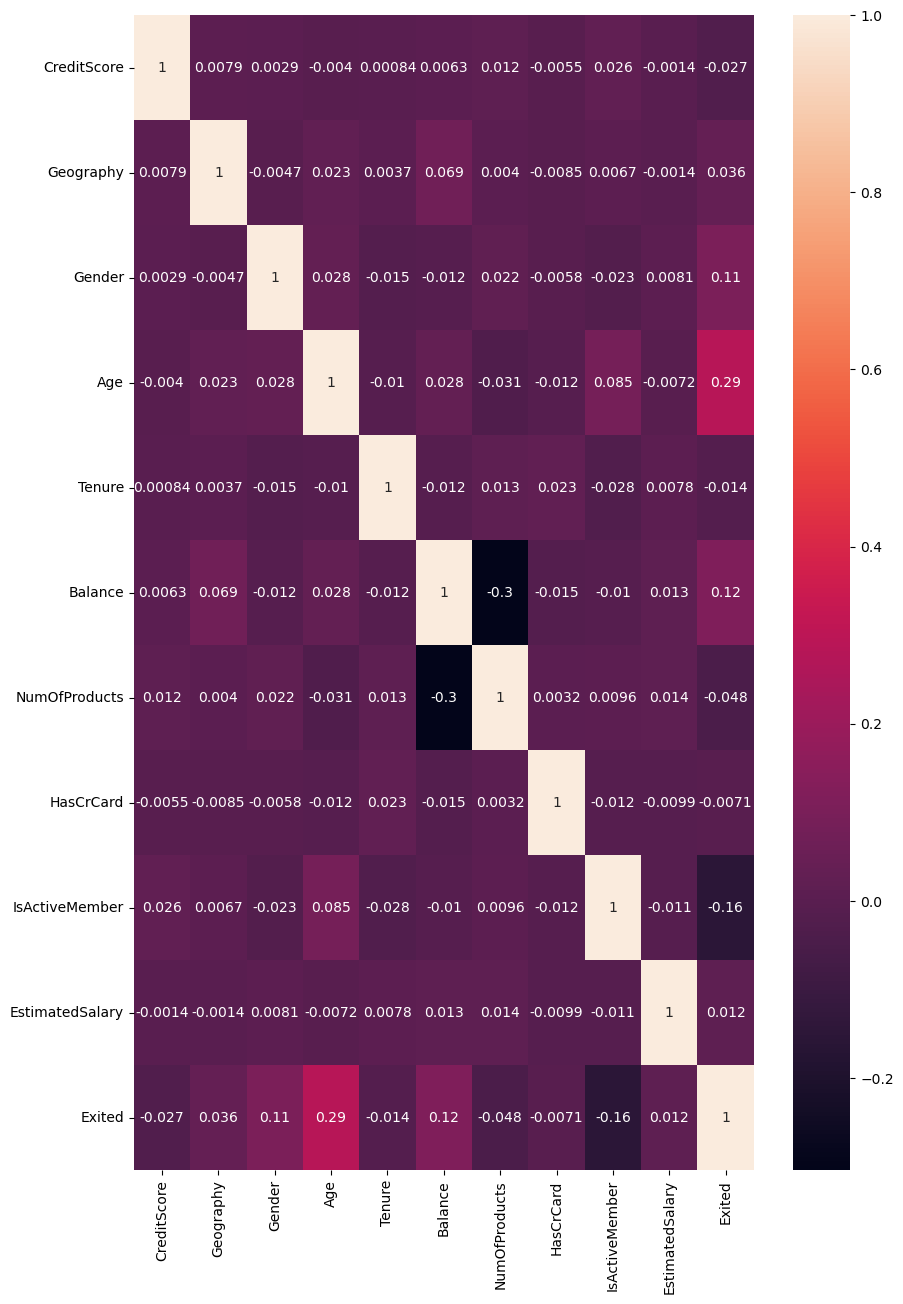

In [26]:
plt.figure(figsize=(10,15))
sns.heatmap(corr,annot=True)

In [27]:
churn_df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,1,42,2,0.00,1,1,1,101348.88,1
1,608,2,1,41,1,83807.86,1,0,1,112542.58,0
2,502,0,1,42,8,159660.80,3,1,0,113931.57,1
3,699,0,1,39,1,0.00,2,0,0,93826.63,0
4,850,2,1,43,2,125510.82,1,1,1,79084.10,0


#### Splitting Data

In [28]:
X = churn_df.drop('Exited',axis =1)

y = churn_df['Exited']

In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

#### Model Building

#### 1. Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()


In [31]:
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [34]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

Accuracy: 0.8005
Confusion Matrix:
 [[1573   34]
 [ 365   28]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.98      0.89      1607
           1       0.45      0.07      0.12       393

    accuracy                           0.80      2000
   macro avg       0.63      0.53      0.51      2000
weighted avg       0.74      0.80      0.74      2000



#### 2. Random Forest Classifier

In [35]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.87


#### 3. Gradient Boosting Classifier

In [36]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train,y_train)
y_pred = gbc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.87


In conclusion, the Bank Customer Churn Prediction models, especially Random Forest and XGBoosting, exhibit promising accuracy in identifying customers at risk of churning. This predictive capability empowers the bank to proactively implement retention strategies and enhance overall customer satisfaction. The findings from this project contribute valuable insights to customer relationship management, providing a foundation for ongoing efforts to optimize customer retention and engagement strategies.